PLOTTING BAR CHART OF CAREER OPTIONS
by: SHASHI VALLABH MAKKAPATI 23EC30048

Importing the necessary python libraries pandas and mathplotlib.pyplot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Code for levenshtein distance using dynamic programming and matrices

In [ ]:
def levenshtein(str1,str2):
    matrix=matrix = [[0] * (len(str2) + 1) for i in range(len(str1) + 1)] #creates matrix and initialises elements to null using concatination
    #first row and column are filled as standard cases(number of deletions/insertions needed to make it a null string
    for i in range(len(str1)+1):
        matrix[i][0]=i
    for j in range(len(str2)+1):
        matrix[0][j]=j
    #remaining elements can be filled using the previously filled elements
    for i in range(1,len(str1)+1):
        for j in range(1,len(str2)+1):
            replace_or_leave=(str1[i-1])!=(str2[j-1])
            matrix[i][j] = min(matrix[i - 1][j] + 1,  #deletion
                               matrix[i][j - 1] + 1,  #insertion
                               matrix[i - 1][j - 1] + replace_or_leave) #substitution
    return matrix[-1][-1] #bottom right corner elements gives us the required distance

Creating a pandas series which will store the frequencies of the career options

In [ ]:
career=pd.Series([0]*10)
career.index=['doctor','lawyer','teacher','engineer','accountant','nurse','police','architect','dentist','pharmacist']

creating a csv reader object which will read the data from csv to a data frame called df

In [ ]:
df = pd.read_csv(r"C:\Users\shash\Downloads\data.csv",header=None)

Now we read each response submitted in the form and analyse the data

In [ ]:
for i in range(1406):
    #we define a dictionary which stores each levenshtein distance of each record to each proffesion
    p={'doctor':0,'lawyer':0,'teacher':0,'engineer':0,'accountant':0,'nurse':0,'police':0,'architect':0,'dentist':0,'pharmacist':0}
    for j in career.index:
        str=df.iloc[i,0]
        p[j]=levenshtein(j,str.lower())
        #the career option with least levenshtein distance is the corrected word
        mini=min(p.values())
    corrected_word=[key for key in p if p[key] == mini]
    if len(corrected_word)>1:
           #if there is a tie in the minimum value, we remove vowels from the record and repeat the process
           #idea is that there is more chance to mispell the vowels
           vowels = "aeiouAEIOU"
           str_without_vowels=''.join(char for char in str if char not in vowels)
           p[j]=levenshtein(j,str_without_vowels.lower())
           mini=min(p.values())
           corrected_word=[key for key in p if p[key] == mini]
    career[corrected_word[0]]=career[corrected_word[0]]+1

we then plot the final frequencies

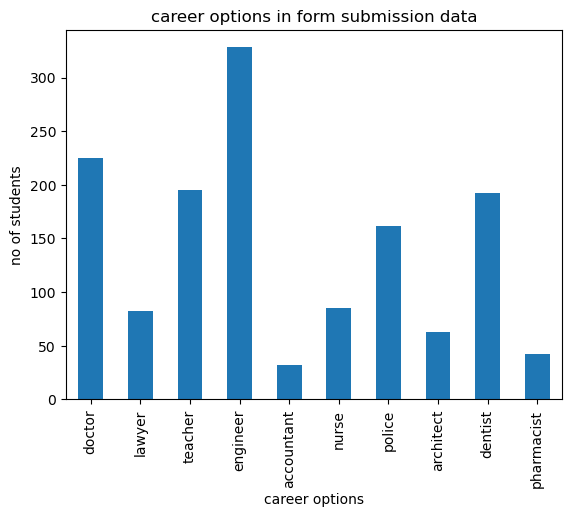

In [ ]:
career.plot(kind='bar')
plt.xlabel('career options')
plt.ylabel('no of students')
plt.title('career options in form submission data')
plt.show()

frequencies that were plotted

In [ ]:
print(career)

doctor        225
lawyer         82
teacher       195
engineer      328
accountant     32
nurse          85
police        162
architect      63
dentist       192
pharmacist     42
dtype: int64
